<a href="https://colab.research.google.com/github/razalamb1/exploratory-analysis-book/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis
First, ingesting the book

In [44]:
import nltk
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pathlib import Path
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
!wget https://gutenberg.org/cache/epub/4367/pg4367.txt

--2021-09-17 01:02:20--  https://gutenberg.org/cache/epub/4367/pg4367.txt
Resolving gutenberg.org (gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to gutenberg.org (gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1670765 (1.6M) [text/plain]
Saving to: ‘pg4367.txt’

pg4367.txt          100%[===================>]   1.59M  3.96MB/s    in 0.4s    

2021-09-17 01:02:21 (3.96 MB/s) - ‘pg4367.txt’ saved [1670765/1670765]



In [36]:
grant_book = Path('pg4367.txt').read_text()

## Tokenizing Data
Now, seperate the text file into words and remove the stopwords.

In [67]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = nltk.tokenize.word_tokenize(grant_book)
final = [w.lower() for w in words if not w.lower() in stop_words]

## Actual Analysis
Now we get to the fun part! Below first I create a simple word cloud to answer the question: "What words occur most frequently in Ulysses S. Grant's full personal memoirs.

In [38]:
%matplotlib inline
sb.set()
grant_text = " ".join(final)
wcloud = WordCloud().generate(grant_text)

(-0.5, 399.5, 199.5, -0.5)

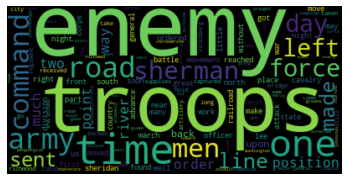

In [39]:
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

## Geographical Analysis
Next, I want to see how many times each U.S. state is referenced in Grant's memoirs.

In [65]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
lstates = [state.lower() for state in states]
series = pd.Series([0]*50, index = lstates)
for i in final:
  if i in lstates:
    series[i] += 1
    pass
  pass
series = series[series != 0].sort_values()


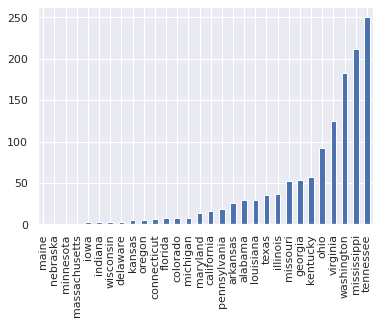

In [66]:
series.plot.bar()